In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_excel("movie_metadata-my.xls", sheetname='movie_metadata')

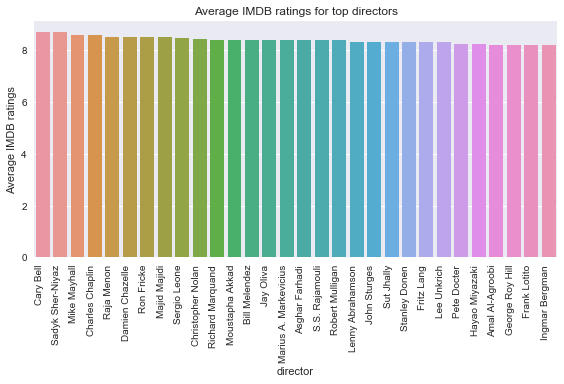

In [19]:
#average rating for director
directors = data.director_name.dropna().unique()
score = data.groupby(["director_name"]).mean()["movie_score"]

director_df = pd.DataFrame([(i, score[i]) for i in directors], columns=["director", "score"])

top_director = director_df.sort_values(by="score",ascending=False).head(30)

sns.barplot(x="director", y="score", data=top_director)
plt.xticks([i - 0.2 for i in range(len(top_director))], top_director["director"], rotation=90)
plt.ylabel("Average IMDB ratings")
plt.title("Average IMDB ratings for top directors")
plt.tight_layout()
plt.show()


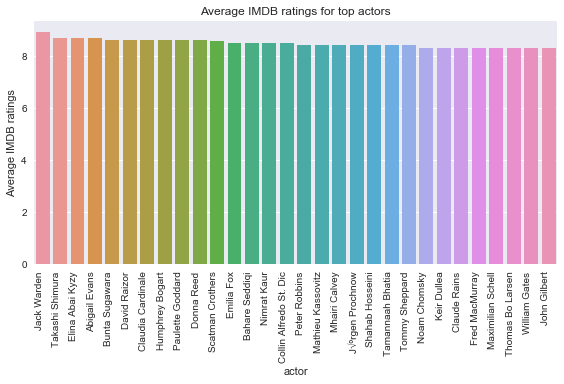

In [20]:
#average rating for actor
actors = data.actor_1_name.dropna().unique()
score = data.groupby(["actor_1_name"]).mean()["movie_score"]

actor_df = pd.DataFrame([(i, score[i]) for i in actors], columns=["actor", "score"])

top_actors = actor_df.sort_values(by="score",ascending=False).head(30)

sns.barplot(x="actor", y="score", data=top_actors)
plt.xticks([i - 0.2 for i in range(len(top_actors))], top_actors["actor"], rotation=90)
plt.ylabel("Average IMDB ratings")
plt.title("Average IMDB ratings for top actors")
plt.tight_layout()
plt.show()

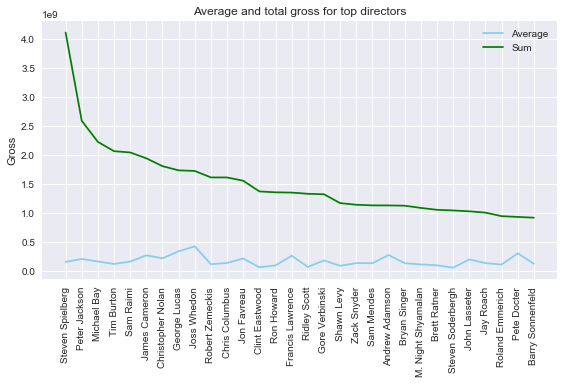

In [21]:
#average earning for director
directors = data.director_name.dropna().unique()
score = data.groupby(["director_name"]).mean()["gross"]
score2 = data.groupby(["director_name"]).sum()["gross"]

director_df = pd.DataFrame([(i, score[i], score2[i]) for i in directors], columns=["director", "Average", "Sum"])

top_director = director_df.sort_values(by="Sum",ascending=False).head(30)

plt.plot( np.arange(len(top_director)), top_director["Average"] , color='skyblue')
plt.plot(np.arange(len(top_director)), top_director["Sum"], color='green')
plt.legend()
plt.xticks(np.arange(len(top_director)), top_director["director"], rotation=90)
plt.ylabel("Gross")
plt.title("Average and total gross for top directors")
plt.tight_layout()
plt.show()

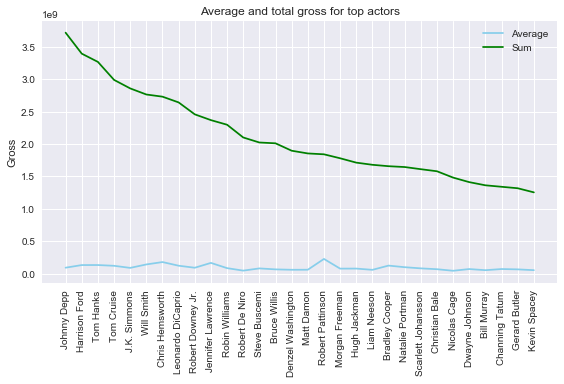

In [22]:
#average earning for actor
actors = data.actor_1_name.dropna().unique()
score = data.groupby(["actor_1_name"]).mean()["gross"]
score2 = data.groupby(["actor_1_name"]).sum()["gross"]

actor_df = pd.DataFrame([(i, score[i], score2[i]) for i in actors], columns=["actor", "Average", "Sum"])

top_actors = actor_df.sort_values(by="Sum",ascending=False).head(30)

plt.plot( np.arange(len(top_actors)), top_actors["Average"] , color='skyblue')
plt.plot(np.arange(len(top_actors)), top_actors["Sum"], color='green')
plt.legend()
plt.xticks(np.arange(len(top_actors)), top_actors["actor"], rotation=90)
plt.ylabel("Gross")
plt.title("Average and total gross for top actors")
plt.tight_layout()
plt.show()

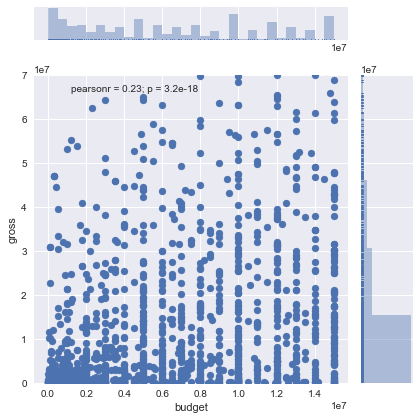

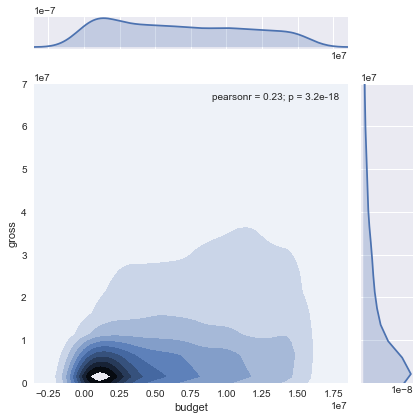

In [23]:
#budget vs gross marginal plot
temp = data.sort_values("budget").head(2000)

#scatter plot with marginal histograms
sns.jointplot(x=temp["budget"], y=temp["gross"], kind='scatter',marginal_kws=dict(bins=30, rug=True))
sns.plt.ylim(0, 70000000)
plt.tight_layout()
sns.plt.show()

#kde plot with marginal density destribution
sns.jointplot(x=temp["budget"], y=temp["gross"], kind='kde')
sns.plt.ylim(0, 70000000)
plt.tight_layout()
sns.plt.show()



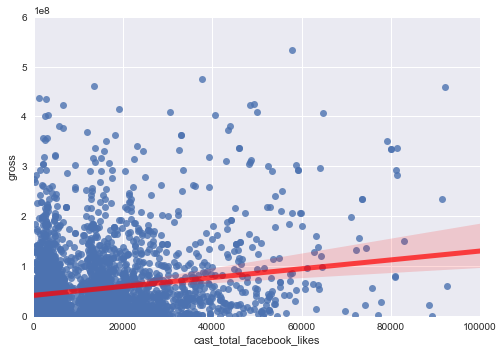

In [24]:
#actor popularity vs gross with regression
sns.regplot(x="cast_total_facebook_likes", y="gross", data=data, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.plt.xlim(0, 100000)
sns.plt.ylim(0, 600000000)
sns.plt.show()


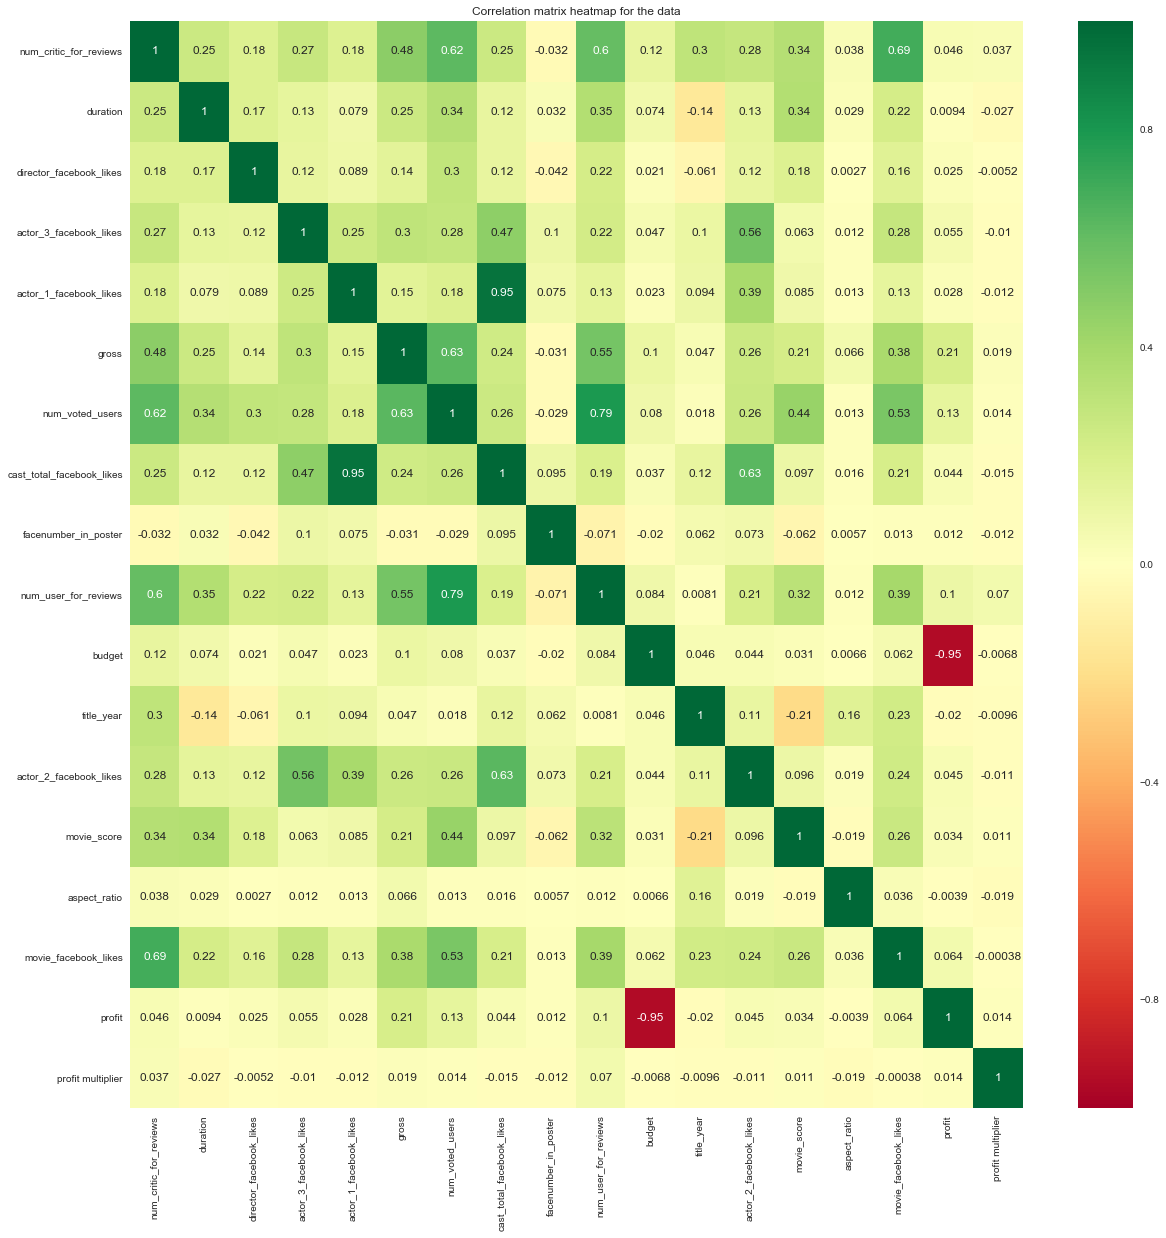

In [25]:
#correlation matrix heat map
corr_matrix=data.corr() 
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
plt.title("Correlation matrix heatmap for the data")
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(corr_matrix, cmap='PuOr')

sns.plt.show()


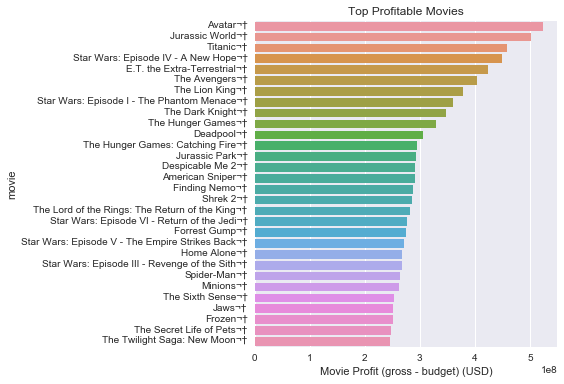

In [26]:
#Top Profitable movies in USD
movie = data.movie_title.dropna().unique()
score = data.groupby(["movie_title"]).max()["profit"]

profit_df = pd.DataFrame([(i, score[i]) for i in movie], columns=["movie", "profit"])

top_profit = profit_df.sort_values(by="profit",ascending=False).head(30)

sns.barplot(x="profit", y="movie", data=top_profit)
plt.yticks([i - 0.2 for i in range(len(top_profit))], top_profit["movie"])
plt.xlabel("Movie Profit (gross - budget) (USD)")
plt.title("Top Profitable Movies")
plt.tight_layout()
plt.show()

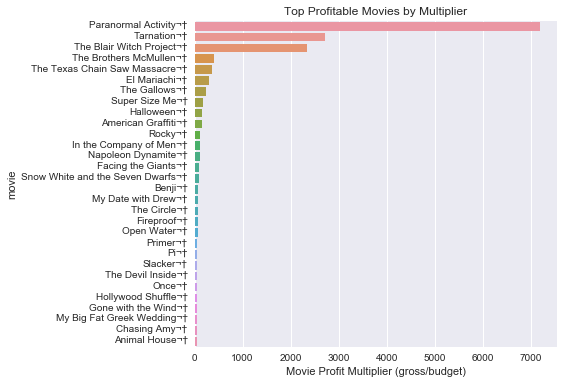

In [27]:
#Top Profitable movies by multiple of budget
movie = data.movie_title.dropna().unique()
score = data.groupby(["movie_title"]).max()["profit multiplier"]

profit_df = pd.DataFrame([(i, score[i]) for i in movie], columns=["movie", "profit"])

top_profit = profit_df.sort_values(by="profit",ascending=False).head(30)

sns.barplot(x="profit", y="movie", data=top_profit)
plt.yticks([i - 0.2 for i in range(len(top_profit))], top_profit["movie"])
plt.xlabel("Movie Profit Multiplier (gross/budget)")
plt.title("Top Profitable Movies by Multiplier")
plt.tight_layout()
plt.show()